In [134]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
import os, sys
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import geopandas as gpd
import shapely
import pandas as pd
from geodatasets import get_path
import ast
# import geopy.distance
from tqdm import tqdm

sys.path.append('../src/')
sys.path.append('../content/')
import data_utils as du
import vis_utils as vu
import loadpaths
path_dict_pecl = loadpaths.loadpaths()
# import shapely
# from tqdm import tqdm, tqdm_notebook
# import ast, shutil

## Download EO data from Google Earth Engine via API

*API key required:* assuming a file `content/api_keys.py` that just contains the line `GEE_API = '<key>'`

In [5]:
import ee, geemap
import api_keys

ee.Authenticate()
ee.Initialize(project=api_keys.GEE_API)
geemap.ee_initialize()

In [21]:
# tmp = du.get_gee_image_from_point(coords_keep[0], image_collection='dsm',
                                #   threshold_size=1)
tmp = du.download_gee_image(coords_keep[0], name='tmp-dsm', image_collection='dsm', resize_image=True)
# tmp.getInfo()

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/tmp-dsm_dsm_y-2024.tif


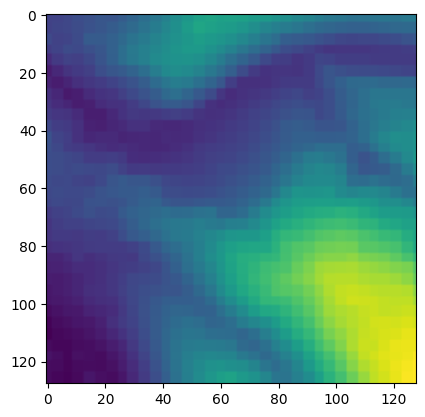

In [17]:
plt.imshow(np.squeeze(tmp[0].values))

In [133]:
# tmp_coords_list = [(-5.829883, 54.248818),
#                 (-4.247973, 51.627768),
#                 (-4.05749, 52.521469),
#                 (-1.226506, 50.891421),
#                 (-2.361399, 52.385976),
#                 (-1.554099, 50.830184),
#                 (-0.208709, 51.842453),
#                 (1.005961, 51.331986),
#                 (-0.828484, 50.888106),
#                 (-1.420833, 52.403092)]

coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep = [tuple(x) for x in coords_keep.values]
coords_keep

# tmp = du.download_gee_image(tmp_coords_list[0], name='tmp-dynamicworld', image_collection='dynamicworld', resize_image=True)

du.download_list_coord(
                    #    coord_list=tmp_coords_list, 
                    #    name_group='pecl-fig', path_save='../content/sample_data',
                       coord_list=coords_keep,
                        # coord_list=[coords_keep[i] for i in list_inds_redo],
                       name_group='pecl176', path_save='/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km_v2',
                       start_index=0, stop_index=None)

# for ii, tmp_coords in enumerate(tmp_coords_list):
#     im, path_im = du.download_gee_image(coords=tmp_coords, name=f'pecl-fig-{ii}',  verbose=0,
#                                         path_save='../content/sample_data',
#                                                 image_collection='dynamicworld')

  0%|          | 0/176 [00:00<?, ?it/s]

Created folder /Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km_v2


  6%|▌         | 10/176 [02:22<39:09, 14.15s/it]

  7%|▋         | 12/176 [03:02<49:07, 17.97s/it]

Image pecl176-12, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  9%|▊         | 15/176 [03:54<47:15, 17.61s/it]

 15%|█▍        | 26/176 [06:14<33:09, 13.27s/it]

 28%|██▊       | 49/176 [11:44<24:56, 11.79s/it]

 37%|███▋      | 65/176 [14:57<23:07, 12.50s/it]

 61%|██████▏   | 108/176 [25:53<22:04, 19.48s/it]

 78%|███████▊  | 138/176 [32:57<09:22, 14.81s/it]

Image pecl176-138, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 88%|████████▊ | 154/176 [36:43<04:19, 11.81s/it]

 90%|████████▉ | 158/176 [37:39<03:58, 13.24s/it]

100%|██████████| 176/176 [41:19<00:00, 14.09s/it]

Images that could not be downloaded: ['10_alphaearth', '12_worldclimbio', '15_sentinel2', '26_sentinel2', '49_sentinel2', '65_alphaearth', '108_alphaearth', '138_worldclimbio', '153_dsm', '158_sentinel2']


['10_alphaearth',
 '12_worldclimbio',
 '15_sentinel2',
 '26_sentinel2',
 '49_sentinel2',
 '65_alphaearth',
 '108_alphaearth',
 '138_worldclimbio',
 '153_dsm',
 '158_sentinel2']

In [46]:
du.download_gee_image(coords=tmp_coords, name='sample-0', image_collection='alphaearth')

Generating URL ...
Please wait ...
Data downloaded to /Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif


(<xarray.DataArray (band: 64, y: 128, x: 128)>
 [1048576 values with dtype=float64]
 Coordinates:
   * band         (band) int64 1 2 3 4 5 6 7 8 9 ... 56 57 58 59 60 61 62 63 64
   * x            (x) float64 5.759e+05 5.76e+05 5.76e+05 ... 5.772e+05 5.772e+05
   * y            (y) float64 6.012e+06 6.012e+06 ... 6.014e+06 6.014e+06
     spatial_ref  int64 0
 Attributes:
     AREA_OR_POINT:           Area
     TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
     TIFFTAG_XRESOLUTION:     1
     TIFFTAG_YRESOLUTION:     1
     _FillValue:              -inf
     scale_factor:            1.0
     add_offset:              0.0,
 '/Users/tplas/data/2025-10 neureo/sample/sample-0_alphaearth_y-None.tif')

# Plot data

Sentinel-2: (4, 128, 128) <class 'xarray.core.dataarray.DataArray'>
AlphaEarth: (64, 128, 128) <class 'xarray.core.dataarray.DataArray'>
Dynamic World: (9, 128, 128) <class 'xarray.core.dataarray.DataArray'>
WorldClimBio: <class 'dict'> dict_keys(['bio01', 'bio02', 'bio03', 'bio04', 'bio05', 'bio06', 'bio07', 'bio08', 'bio09', 'bio10', 'bio11', 'bio12', 'bio13', 'bio14', 'bio15', 'bio16', 'bio17', 'bio18', 'bio19', 'coords', 'name'])
DSM: (1, 128, 128) <class 'xarray.core.dataarray.DataArray'>


Text(0.5, 1.0, 'Dynamic World (water)')

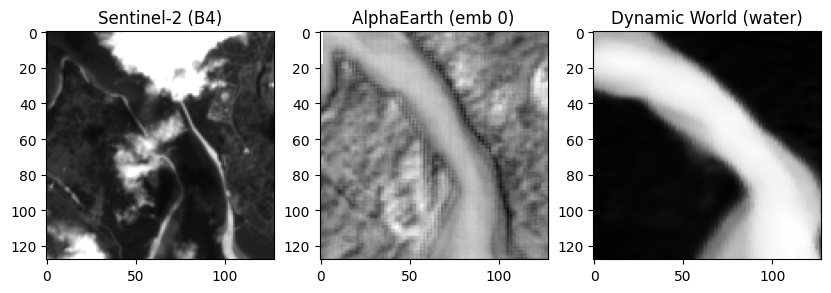

In [39]:
(data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name='pecl-fig-0', path_folder='../content/sample_data', verbose=1)

fig, ax = plt.subplots(1,3, figsize=(10,3))

ax[0].imshow(np.clip(data_sent[0, ...], 0, 3000) / 3000, cmap='gray')
ax[0].set_title('Sentinel-2 (B4)')
ax[1].imshow(data_alpha[0, ...], cmap='gray')
ax[1].set_title('AlphaEarth (emb 0)')
ax[2].imshow(data_dyn[0, ...], cmap='gray')
ax[2].set_title('Dynamic World (water)')

LC pixel count: Counter({np.int64(1): 8610, np.int64(0): 6882, np.int64(7): 417, np.int64(6): 382, np.int64(2): 87, np.int64(8): 5, np.int64(5): 1})


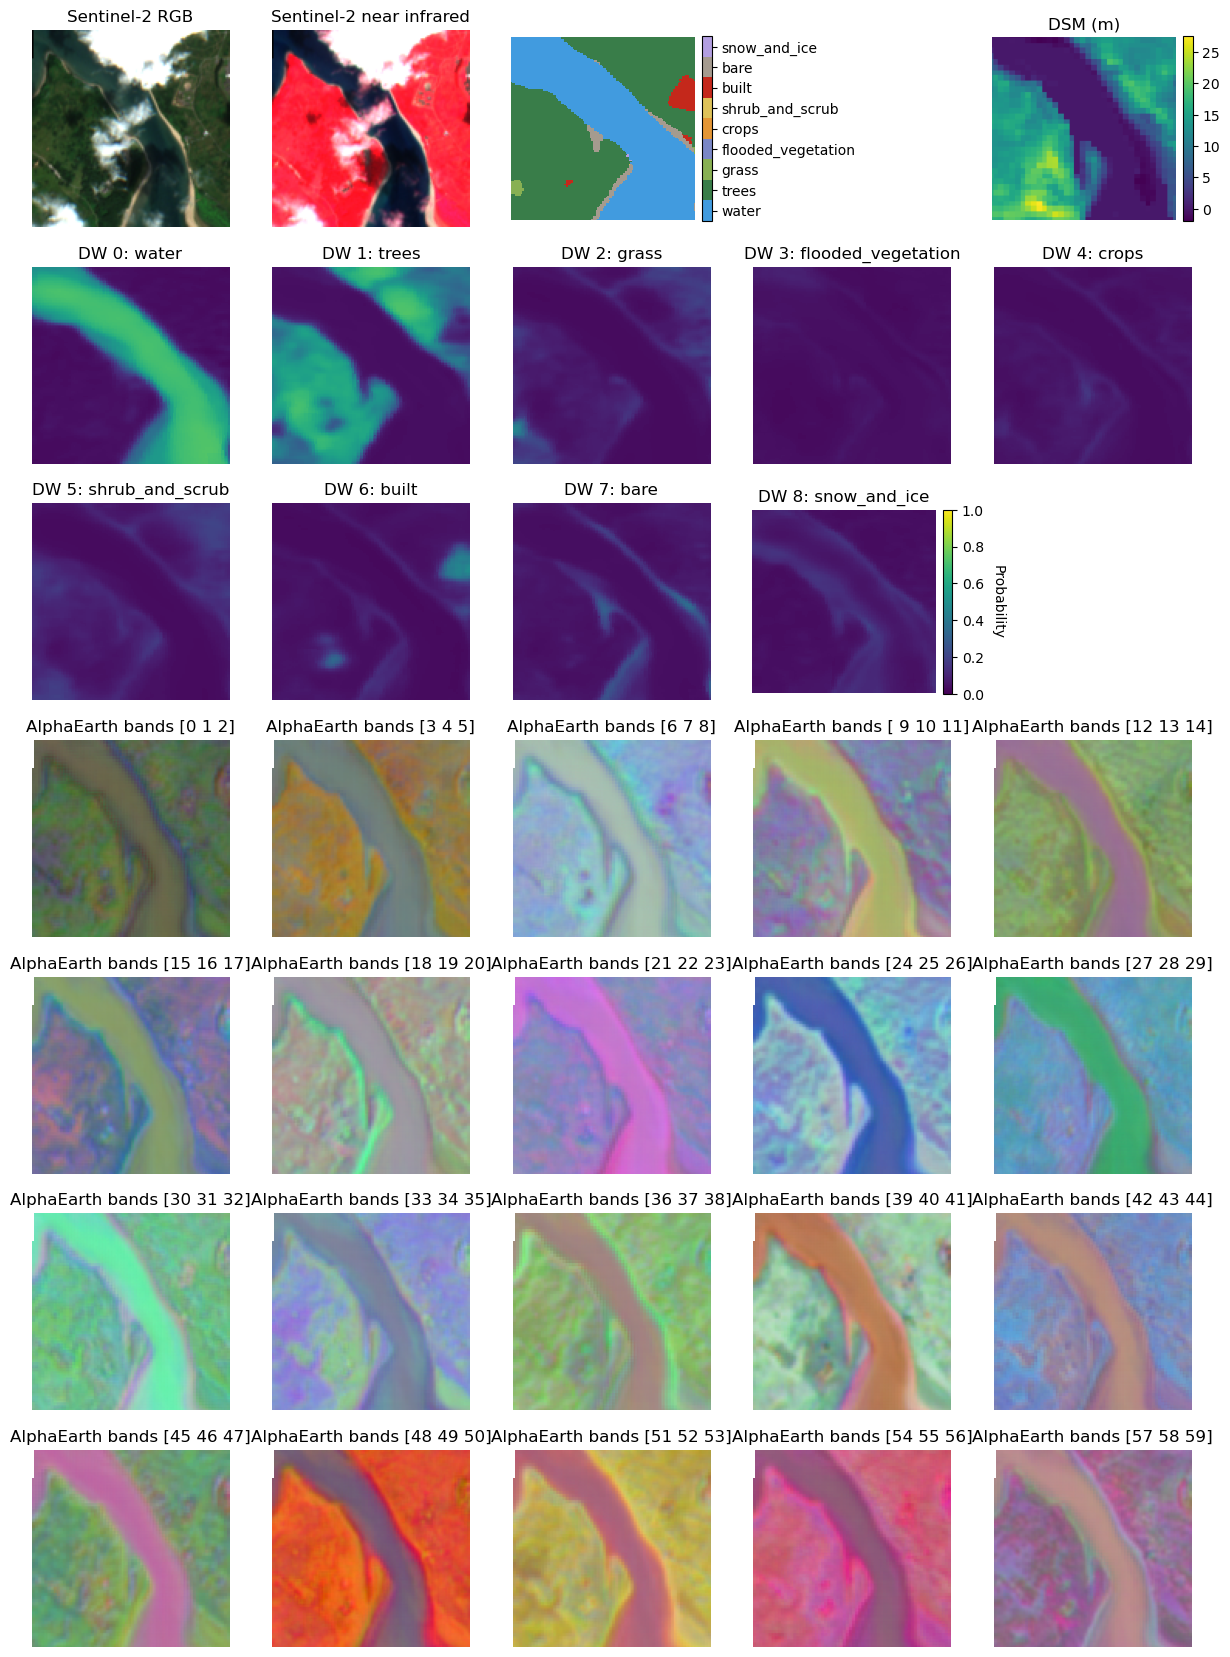

In [158]:
vu.plot_overview_images('../content/sample_data', name='pecl-fig-0', plot_alphaearth=True, plot_dynamicworld_full=True)

# vu.plot_overview_images('/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km_v2', name='pecl176-3', plot_alphaearth=True, plot_dynamicworld_full=True)

LC pixel count: Counter({1: 12671, 2: 2522, 0: 1051, 4: 95, 6: 43, 5: 2})


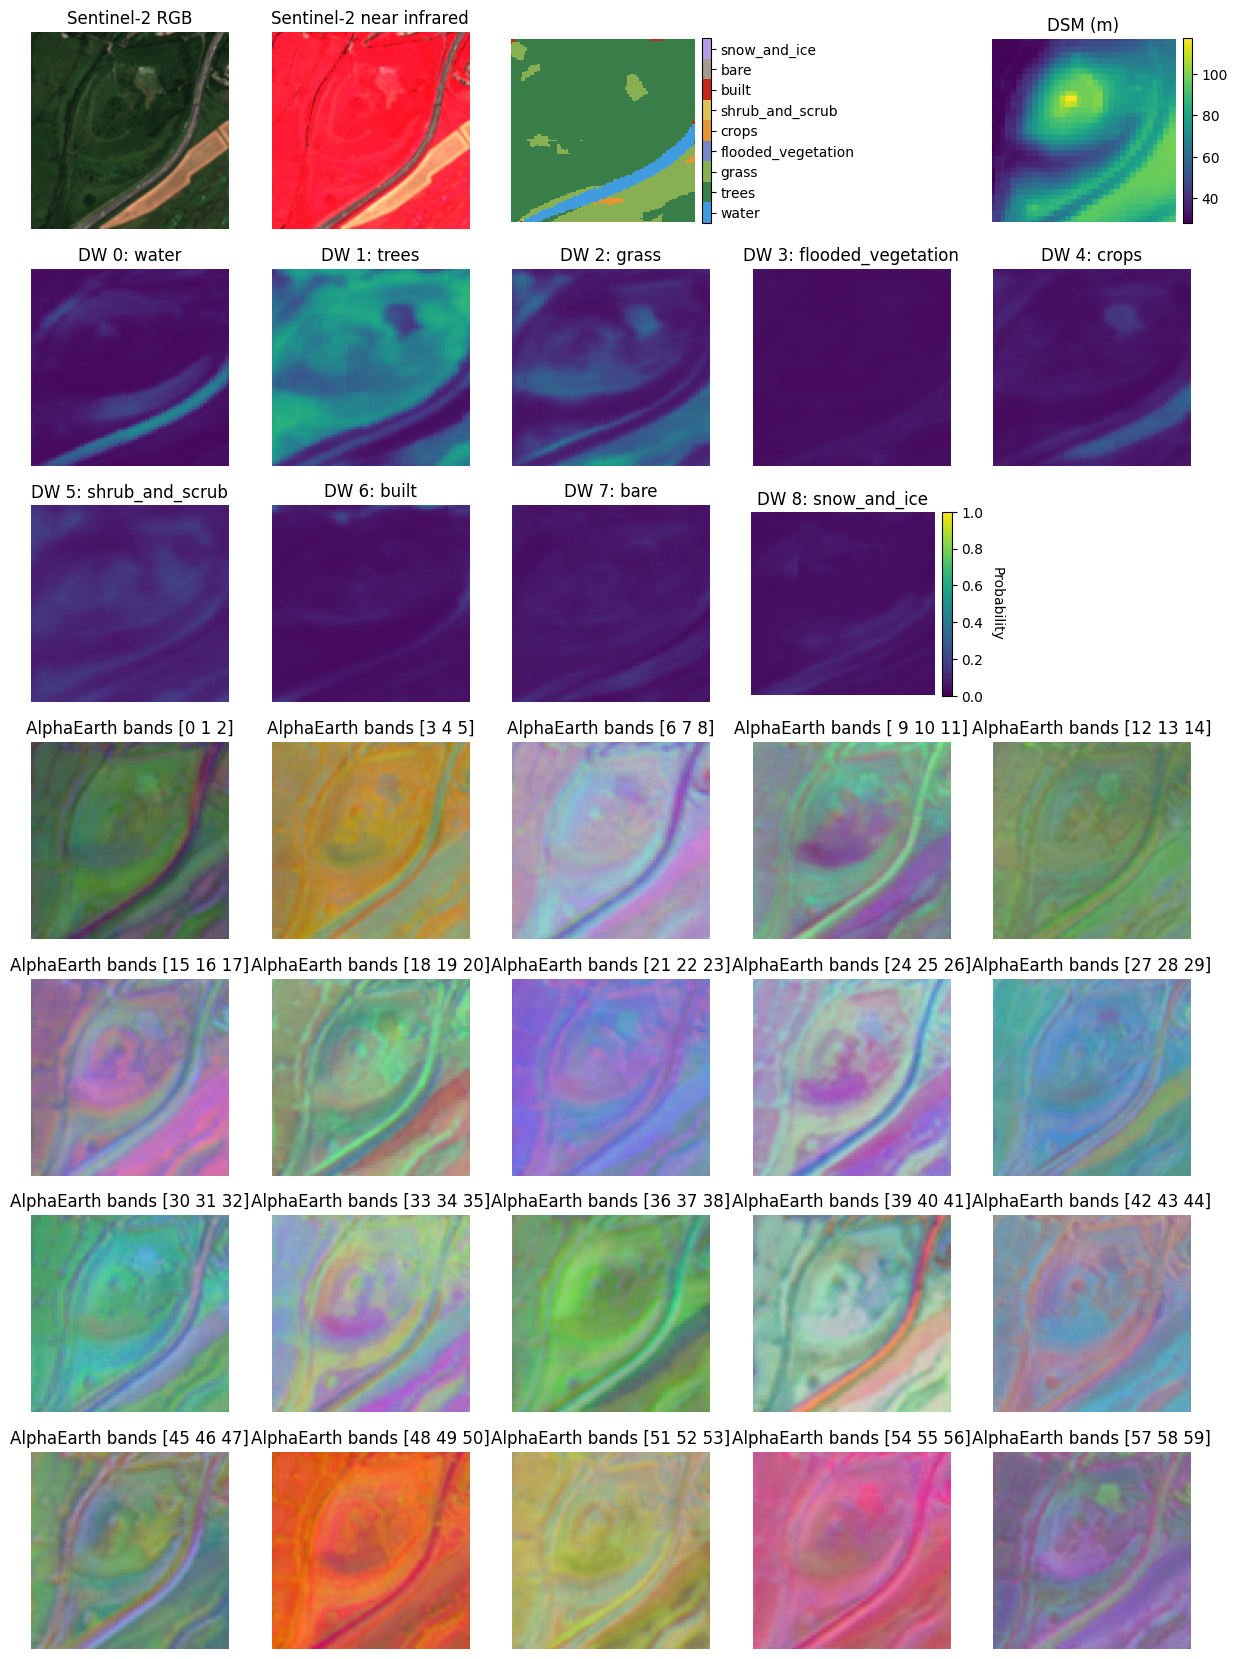

In [35]:
path_folder = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-45km/'
assert os.path.exists(path_folder)
# os.listdir(path_folder)[0:5]
du.plot_overview_images(path_folder, name='pecl100-4', plot_alphaearth=True, plot_dynamicworld_full=True)

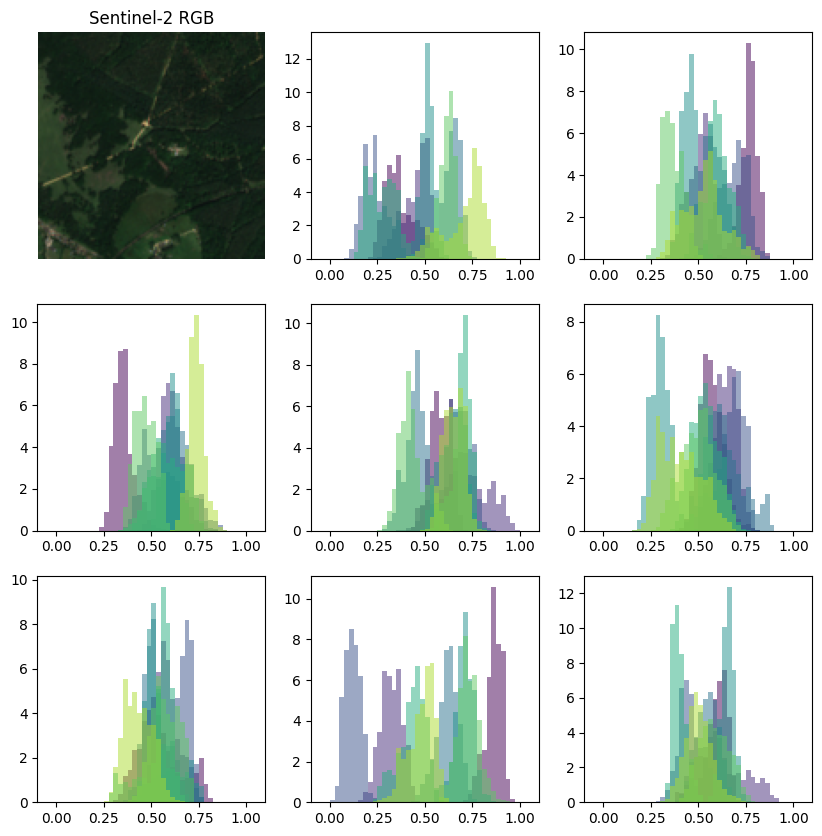

In [13]:
du.plot_distr_embeddings('../content/sample_data', name='pecl-fig-5')

In [91]:
# ## Correlation of each alpha earth band with each sentinel-2 band
# correlation_matrix = np.zeros((im_plot_alpha.shape[0], im_plot_s2.shape[0]))
# for i in range(im_plot_alpha.shape[0]):
#     for j in range(im_plot_s2.shape[0]):
#         band_alpha = im_loaded_alpha[i, ...].values.flatten()
#         band_s2 = im_plot_s2[j, ...].values.flatten()
#         correlation_matrix[i, j] = np.corrcoef(band_alpha, band_s2)[0, 1]

# import seaborn as sns
# sns.scatterplot(correlation_matrix) 

In [93]:
# corr_mat_alpha = np.zeros((im_plot_alpha.shape[0], im_plot_alpha.shape[0]))
# for i in range(im_plot_alpha.shape[0]): 
#     for j in range(im_plot_alpha.shape[0]):
#         band_alpha_i = im_loaded_alpha[i, ...].values.flatten()
#         band_alpha_j = im_loaded_alpha[j, ...].values.flatten()
#         corr_mat_alpha[i, j] = np.corrcoef(band_alpha_i, band_alpha_j)[0, 1]
# # sns.heatmap(corr_mat_alpha, )
# plt.imshow(corr_mat_alpha, cmap='coolwarm', vmin=-1, vmax=1)

# Sample locations:

In [ ]:

path_s2bms_presence = "/Users/tplas/data/2025-04-11 S2BMS/ukbms_species-presence/bms_presence_y-2018-2019_th-200.csv"
df_s2bms = pd.read_csv(path_s2bms_presence)
coords_s2bms = list(df_s2bms['tuple_coords'].apply(lambda x: ast.literal_eval(x)))
shuffled_inds = np.random.permutation(len(coords_s2bms))

In [30]:
min_threshold_km = 30
coords_keep = [] 
for ind in tqdm(shuffled_inds):
    coord = coords_s2bms[ind]
    add_coord = True
    if len(coords_keep) == 0:
        coords_keep.append(coord)
        continue
    
    for c in coords_keep:
        dist = geopy.distance.distance(coord, c).km
        if dist < min_threshold_km:
            add_coord = False
            break
    if add_coord:
        coords_keep.append(coord)
    # if len(coords_keep) >= 100:
    #     break

len(coords_keep)

100%|██████████| 1455/1455 [00:03<00:00, 430.56it/s]


176

In [12]:
coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep = [tuple([float(y) for y in x]) for x in coords_keep.values]
coords_keep

[(-1.109573, 51.798774),
 (-2.39995, 53.392663),
 (-1.297994, 50.864895),
 (-0.334642, 51.970188),
 (-2.155165, 52.233593),
 (1.693422, 52.724552),
 (-0.446685, 51.252356),
 (-1.80728, 54.759287),
 (0.861309, 51.083771),
 (-0.98347, 50.952507),
 (-0.630607, 51.812155),
 (-1.338576, 52.986997),
 (-1.660247, 55.612628),
 (-1.464683, 51.198492),
 (0.576829, 51.360206),
 (-2.838185, 54.262246),
 (-0.953508, 52.894335),
 (-0.331154, 53.228847),
 (-2.871642, 51.430258),
 (-0.792606, 51.175504),
 (-1.373998, 54.640998),
 (-3.732046, 50.593336),
 (0.154361, 51.845355),
 (0.791003, 52.974051),
 (-1.420715, 52.412081),
 (-1.78107, 50.875792),
 (-1.520103, 52.736163),
 (-2.648617, 52.933128),
 (-2.079144, 50.642162),
 (-3.723731, 51.519739),
 (-1.100783, 51.51098),
 (1.091353, 51.320768),
 (-2.983638, 56.471723),
 (-1.276666, 54.011338),
 (-2.650749, 55.988748),
 (-4.158371, 51.566501),
 (-4.230955, 50.38697),
 (-3.139935, 51.805607),
 (-0.214884, 52.418007),
 (-2.547711, 50.80277),
 (-1.965318, 

In [ ]:
from collections import Counter
counter_off = {}
counter_all = Counter(int(x.split('_')[0].split('-')[1]) for x in os.listdir('/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km/'))
for k, v in counter_all.items():
    if v != 5:
        counter_off[k] = v
print(len(counter_off), len(counter_all))
# counter_off 
inds_complete = sorted([k for k, v in counter_all.items() if v == 5])
# inds_sel_complete = np.random.choice(inds_complete, size=100, replace=False)
file_inds_sel = '../content/inds_pecl_filtered_30km_100.txt'
if os.path.exists(file_inds_sel):
    inds_sel_complete = np.loadtxt(file_inds_sel).astype(int)

23 176


(np.float64(-8.2), np.float64(2.0), np.float64(49.0), np.float64(61.0))

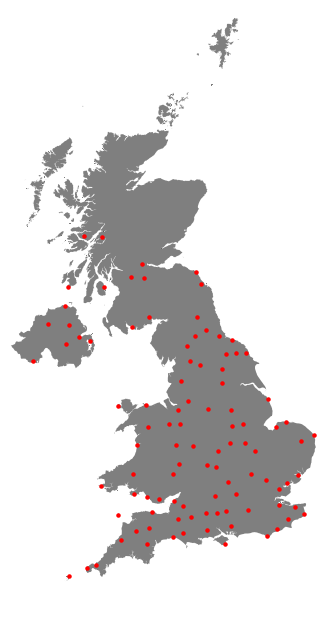

In [ ]:
## plot the selected coordinates on a map
## https://www.diva-gis.org/gdata

path_map = '/Users/tplas/data/2025-10-12 GBR_adm/GBR_adm0.shp'
assert os.path.exists(path_map)

fig_map, ax_map = plt.subplots(1,1, figsize=(5,8))
gdf_uk = gpd.read_file(path_map)
# gdf_uk = gpd.GeoDataFrame(gdf_uk, geometry=gdf_uk.geometry, crs=gdf_uk.crs)
# gdf_uk = gdf_uk.set_geometry('geometry')
gdf_uk['geometry'] = gpd.GeoSeries(gdf_uk['geometry'])
if gdf_uk.crs is None:
    print("CRS is None!")
    gdf_uk = gdf_uk.set_crs('epsg:27700', allow_override=True)
gdf_uk.plot(ax=ax_map, color='k', alpha=0.5)
# print(gdf_uk.crs)
# gdf_uk.crs = 'epsg:27700'
# print(gdf_uk.crs)


point_locs = [coords_keep[x] for x in inds_sel_complete]
# return point_locs|
point_locs = [shapely.geometry.Point(loc) for loc in point_locs]
gdf_bms = gpd.GeoDataFrame(geometry=point_locs)
gdf_bms.crs = gdf_uk.crs
gdf_bms.plot(ax=ax_map, markersize=5, color='red', aspect='auto')
# gdf_bms = gdf_bms.iloc[[126, 167, 370, 457]]
# gdf_bms.plot(ax=ax_map, markersize=5, color=color_dict_stand[0], aspect='auto')
ax_map.set_xlim(-8.2, 2)
ax_map.set_ylim(49, 61)
ax_map.axis('off')

In [26]:
## write inds_sel_complete to file
with open('../content/inds_pecl_filtered_30km_100.txt', 'w') as f:
    for item in sorted(inds_sel_complete):
        f.write("%s\n" % item)

In [35]:
## copy files for selected inds:
folder_original = '/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km/'
folder_destination = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km/'

assert os.path.exists(folder_original) and os.path.exists(folder_destination)
from tqdm import tqdm
import shutil
for ind in tqdm(inds_sel_complete):
    files = [x for x in os.listdir(folder_original) if x.startswith(f'pecl176-{ind}_')]
    assert len(files) == 5, f'For ind {ind}, found {len(files)} files instead of 5.'
    for f in files:
        shutil.copy(os.path.join(folder_original, f), os.path.join(folder_destination, f))

100%|██████████| 100/100 [00:00<00:00, 138.96it/s]


In [24]:
df_coords_keep = pd.DataFrame([coords_keep[x] for x in inds_sel_complete], columns=['lon', 'lat'])
df_coords_keep.to_csv('../content/coords_pecl_filtered_30km_100.csv', index=False)
df_coords_keep

lon        lat
0  -0.983470  50.952507
1  -1.296463  53.741815
2  -2.568475  51.342204
3  -1.781070  50.875792
4  -0.972789  54.575350
..       ...        ...
95 -2.179747  54.651467
96 -3.672617  50.908974
97 -2.722294  51.080586
98 -3.682808  55.017391
99 -6.312717  55.609121

[100 rows x 2 columns]

In [36]:
from collections import Counter
counter_off = {}
counter_all = Counter([x.split('_')[1] for x in os.listdir('/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km/')])
for k, v in counter_all.items():
    if v != 100:
        counter_off[k] = v
print(len(counter_off), len(counter_all))
counter_all

0 5


Counter({'alphaearth': 100,
         'worldclimbio': 100,
         'dynamicworld': 100,
         'dsm': 100,
         'sent2-4band': 100})

In [38]:

# Then collect from all patches the alpha and dyn data
patches = 200
hypotheses = []
features = []
sentinel = []
for p in range(patches):
    # (data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name=f'pecl-fig-{p}', path_folder='../content/sample_data', verbose=1)
    (data_sent, data_alpha, data_dyn, data_worldclim, data_dsm) = du.load_all_modalities_from_name(name=f'pecl176-{p}', path_folder='/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km', verbose=0)
    
    if data_sent is None:
        continue
    # Land coverage and DSM serve as hypotheses
    assert len(data_dyn.data.shape) == 3 and len(data_dsm.data.shape) == 3 and data_dyn.data.shape[1:] == data_dsm.data.shape[1:]
    hypotheses.append(np.concatenate([data_dyn.data, data_dsm.data], axis=0))
    # This can definitely be cleaner but I use nan for undefined values
    f_dat = data_alpha.data
    f_dat[~np.isfinite(f_dat)] = np.nan
    features.append(f_dat)    
    sentinel.append(data_sent.data)

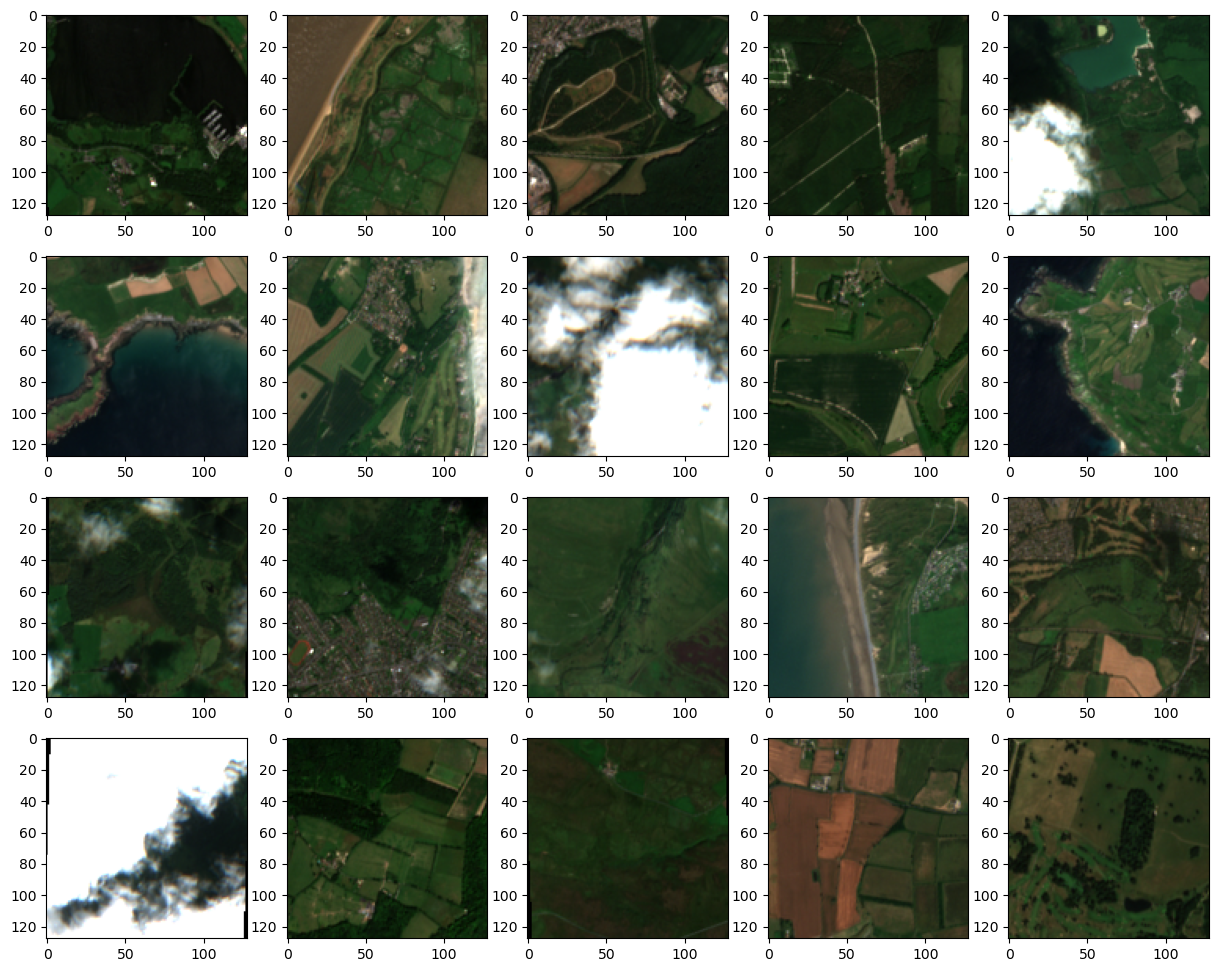

In [51]:
fig, ax = plt.subplots(4, 5, figsize=(15,12))
ax = ax.ravel()

for iplot, ii in enumerate(range(60, 80)):
    du.plot_sent_feat(sentinel[ii], ax=ax[iplot])

In [61]:
ind_feat = 69

## interpolate to 64x64
from scipy.ndimage import zoom
features_resized = []
f_resized = zoom(features[ind_feat], (1, 64/features[ind_feat].shape[1], 64/features[ind_feat].shape[2]), order=1)
f_resized.shape

(64, 64, 64)

In [111]:
len([f for f in features if np.sum(np.isnan(f)) == 0])

79

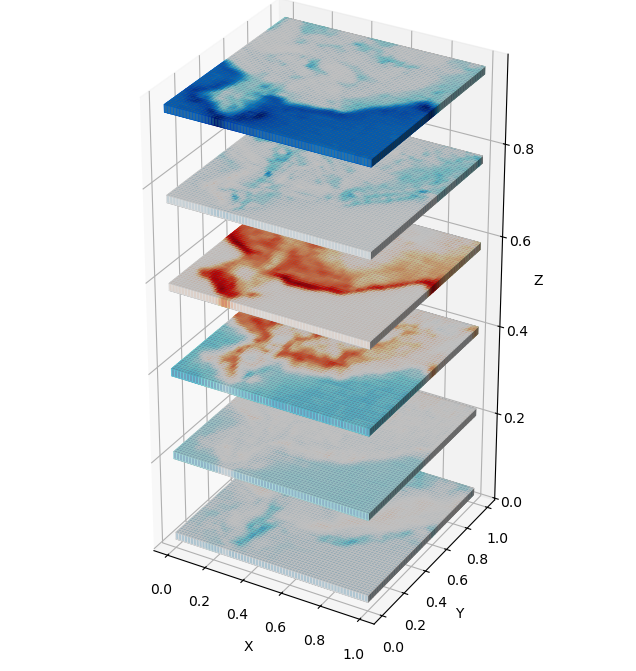

In [ ]:


## Adapted from http://matplotlib.org/stable/gallery/mplot3d/voxels_rgb.html

mat_vals = f_resized
mat_vals = np.swapaxes(mat_vals, 0, 2)  # shape 
mat_vals = np.swapaxes(mat_vals, 0, 1)  # shape
width, depth, height = mat_vals.shape

# Create a 3D grid
x, y, z = np.indices((width+1, depth+1, height+1)) / max(width, depth, height)

# Create a block: True where the voxel exists
cube = np.ones((width, depth, height), dtype=bool)

# Add gaps between height layers
for layer in range(height):
    if layer % 12 != 1:
        cube[:, :, layer] = False  # create gaps

# Map mat_vals to colors
# We'll use a colormap to convert values to RGB
# cmap = plt.cm.viridis  # choose any matplotlib colormap
# norm_vals = (mat_vals - mat_vals.min()) / (mat_vals.max() - mat_vals.min())  # normalize to [0,1]

# colors = np.zeros(cube.shape + (4,))  # RGBA
# colors[cube] = cmap(norm_vals[cube])  # only assign colors to existing voxels

cmap = plt.cm.RdBu_r  # use RdBu_r colormap

# Center normalization at 0
vmax = np.abs(mat_vals).max()
norm_vals = (mat_vals + vmax) / (2 * vmax)  # normalize to [0,1], centered at 0

colors = np.zeros(cube.shape + (4,))  # RGBA
colors[cube] = cmap(norm_vals[cube])  # only assign colors to existing voxels

# Plot
ax = plt.figure(figsize=(10, 8)).add_subplot(projection='3d')
ax.voxels(x, y, z, cube,
          facecolors=colors,
          edgecolors=np.clip(colors[..., :3] * 2 - 0.5, 0, 1),  # brighter edges
          linewidth=0.5)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_box_aspect([width, depth, height * 2])
plt.show()


In [105]:

def compute_range_for_band(band_array, transform, maxlag=2000):
    """Compute spatial correlation length (range) in meters."""
    # Get valid pixels
    rows, cols = np.where(~np.isnan(band_array))
    print(len(rows))
    if len(rows) > 5000:  # sample to speed up
        idx = np.random.choice(len(rows), 5000, replace=False)
        rows, cols = rows[idx], cols[idx]

    # Convert to spatial coordinates
    # xs, ys = transform * (cols, rows)
    xs, ys = transform * cols, transform * rows  # assuming 10m resolution
    coords = np.column_stack([xs, ys])
    values = band_array[rows, cols]

    # Compute variogram
    V = Variogram(coords, values, model='exponential', maxlag=maxlag, n_lags=20, bin_func='even')
    # return V.range  # this is in meters
    return V

tmp = compute_range_for_band(features[1][48, ...], 10)

16384


In [104]:
5 * 64 * 100 / 60

533.3333333333334

374.84410046318345


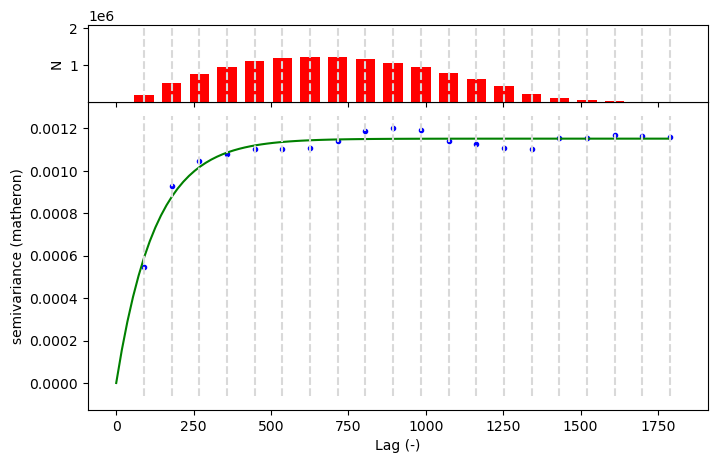

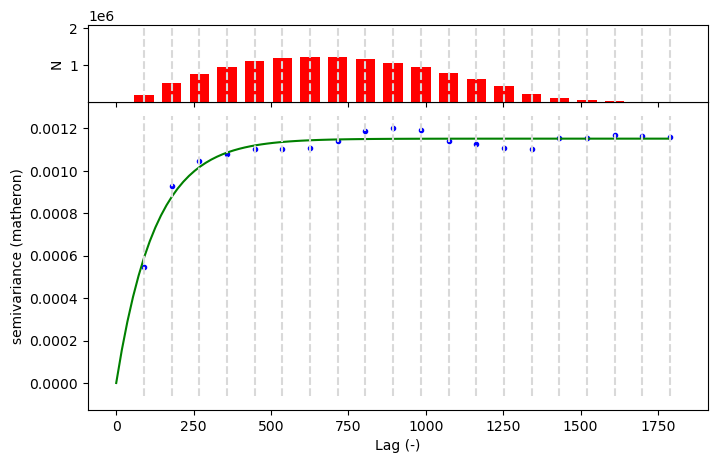

In [106]:
print(tmp.describe()['effective_range'])
tmp.plot()

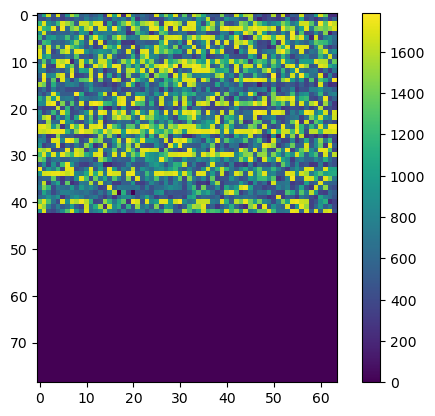

In [116]:
mat_effective_range = np.load('../outputs/spatial_autocorr_pecl100-30km.npy')

plt.imshow(mat_effective_range, cmap='viridis')
plt.colorbar()

# S2-100k

In [ ]:

world = gpd.read_file(get_path("naturalearth.land"))
# ax = world.clip([-90, -55, -25, 15]).plot(color="white", edgecolor="black")

<Axes: >

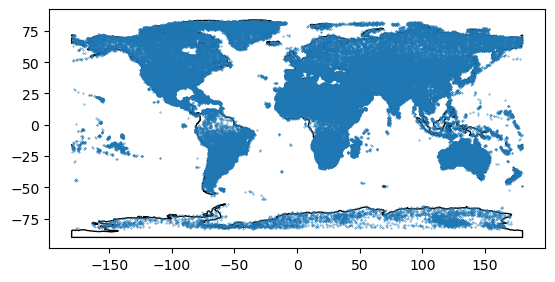

In [89]:
fp_s2100k_index = '/Users/tplas/data/2025-11 s2-100k/index.csv'
df_s2100k = pd.read_csv(fp_s2100k_index)
gdf_s2100k = gpd.GeoDataFrame(df_s2100k, geometry=gpd.points_from_xy(df_s2100k.lon, df_s2100k.lat))
gdf_s2100k.crs = 'epsg:4326'
ax = world.plot(color="white", edgecolor="black")
gdf_s2100k.plot(ax=ax, markersize=.1)

<Axes: >

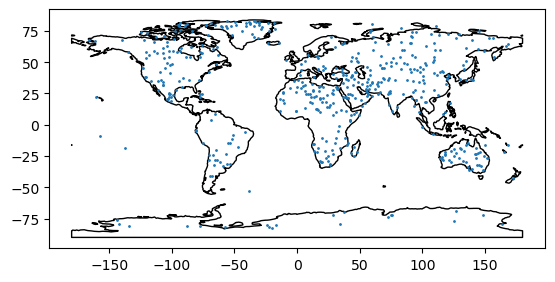

In [255]:
n_s2100 = len(gdf_s2100k)
n_sample = 500 
inds_sample = np.random.choice(n_s2100, size=n_sample, replace=False)
# inds_sample = np.arange(n_sample)
gdf_s2100_sample = gdf_s2100k.iloc[inds_sample]

ax = world.plot(color="white", edgecolor="black")
gdf_s2100_sample.plot(ax=ax, markersize=1)

In [ ]:
coord_list_sample = [(row.lon, row.lat) for idx, row in gdf_s2100_sample.iterrows()]
coord_list = [(row.lon, row.lat) for idx, row in gdf_s2100k.iterrows()]
# coord_list_sample
# 
du.download_list_coord(coord_list=coord_list,
                       name_group='s2100k-', path_save='/Users/tplas/data/2025-10 neureo/s2100k-all-small-2025-11-15',
                       list_collections=['alphaearth'],
                       threshold_size=1, buffer_m=20, resize_image=False)

du.download_list_coord(coord_list=coord_list_sample,
                       name_group='s2100k-300', path_save='/Users/tplas/data/2025-10 neureo/s2100k-300-random-2025-11-15',
                       start_index=176)

(4, 128, 128)


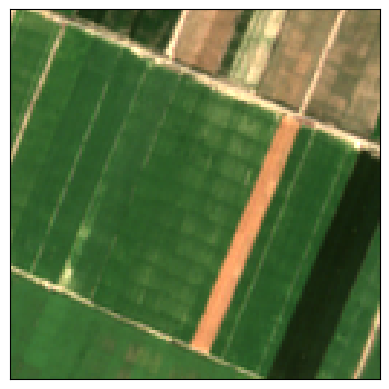

In [91]:
filedir = '/Users/tplas/data/2025-10 neureo/s2100k-100-random-2025-11-12/'
filename = du.create_filename(base_name='s2100k-100-6', image_collection='sentinel2')
filepath = os.path.join(filedir, filename)
assert os.path.exists(filepath), f'File {filepath} does not exist.'
print(du.load_tiff(filepath).shape)
vu.plot_sentinel(du.load_tiff(filepath), clip_im=True)

In [180]:
tmp = du.get_gee_image_from_point(
    # coords=coord_list_sample[0],
    coords=(coords_keep.iloc[5].lon, coords_keep.iloc[5].lat),
                                  image_collection='dynamicworld')
# sentinel: 32631
# DW: 4326
# AE: 32631
# DSM: 4326

tmp.getInfo()

{'type': 'Image',
 'bands': [{'id': 'water',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [164, 165],
   'origin': [41094, -584326],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 0, 0, -10, 0]},
  {'id': 'trees',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [164, 165],
   'origin': [41094, -584326],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 0, 0, -10, 0]},
  {'id': 'grass',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [164, 165],
   'origin': [41094, -584326],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 0, 0, -10, 0]},
  {'id': 'flooded_vegetation',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [164, 165],
   'origin': [41094, -584326],
   'crs': 'EPSG:32631',
   'crs_transform': [10, 0, 0, 0, -10, 0]},
  {'id': 'crops',
   'data_type': {'type': 'PixelType', 'precision': 'double'},
   'dimensions': [164, 165],
   'origin': [41094

In [ ]:
du.download_list_coord(coord_list=[(row.lon, row.lat) for idx, row in coords_keep.iterrows()],
                       name_group='pecl176', path_save='/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km_v2',
                       start_index=0)

LC pixel count: Counter({np.int64(4): 5196, np.int64(1): 5004, np.int64(6): 3874, np.int64(0): 1184, np.int64(5): 800, np.int64(3): 185, np.int64(2): 141})


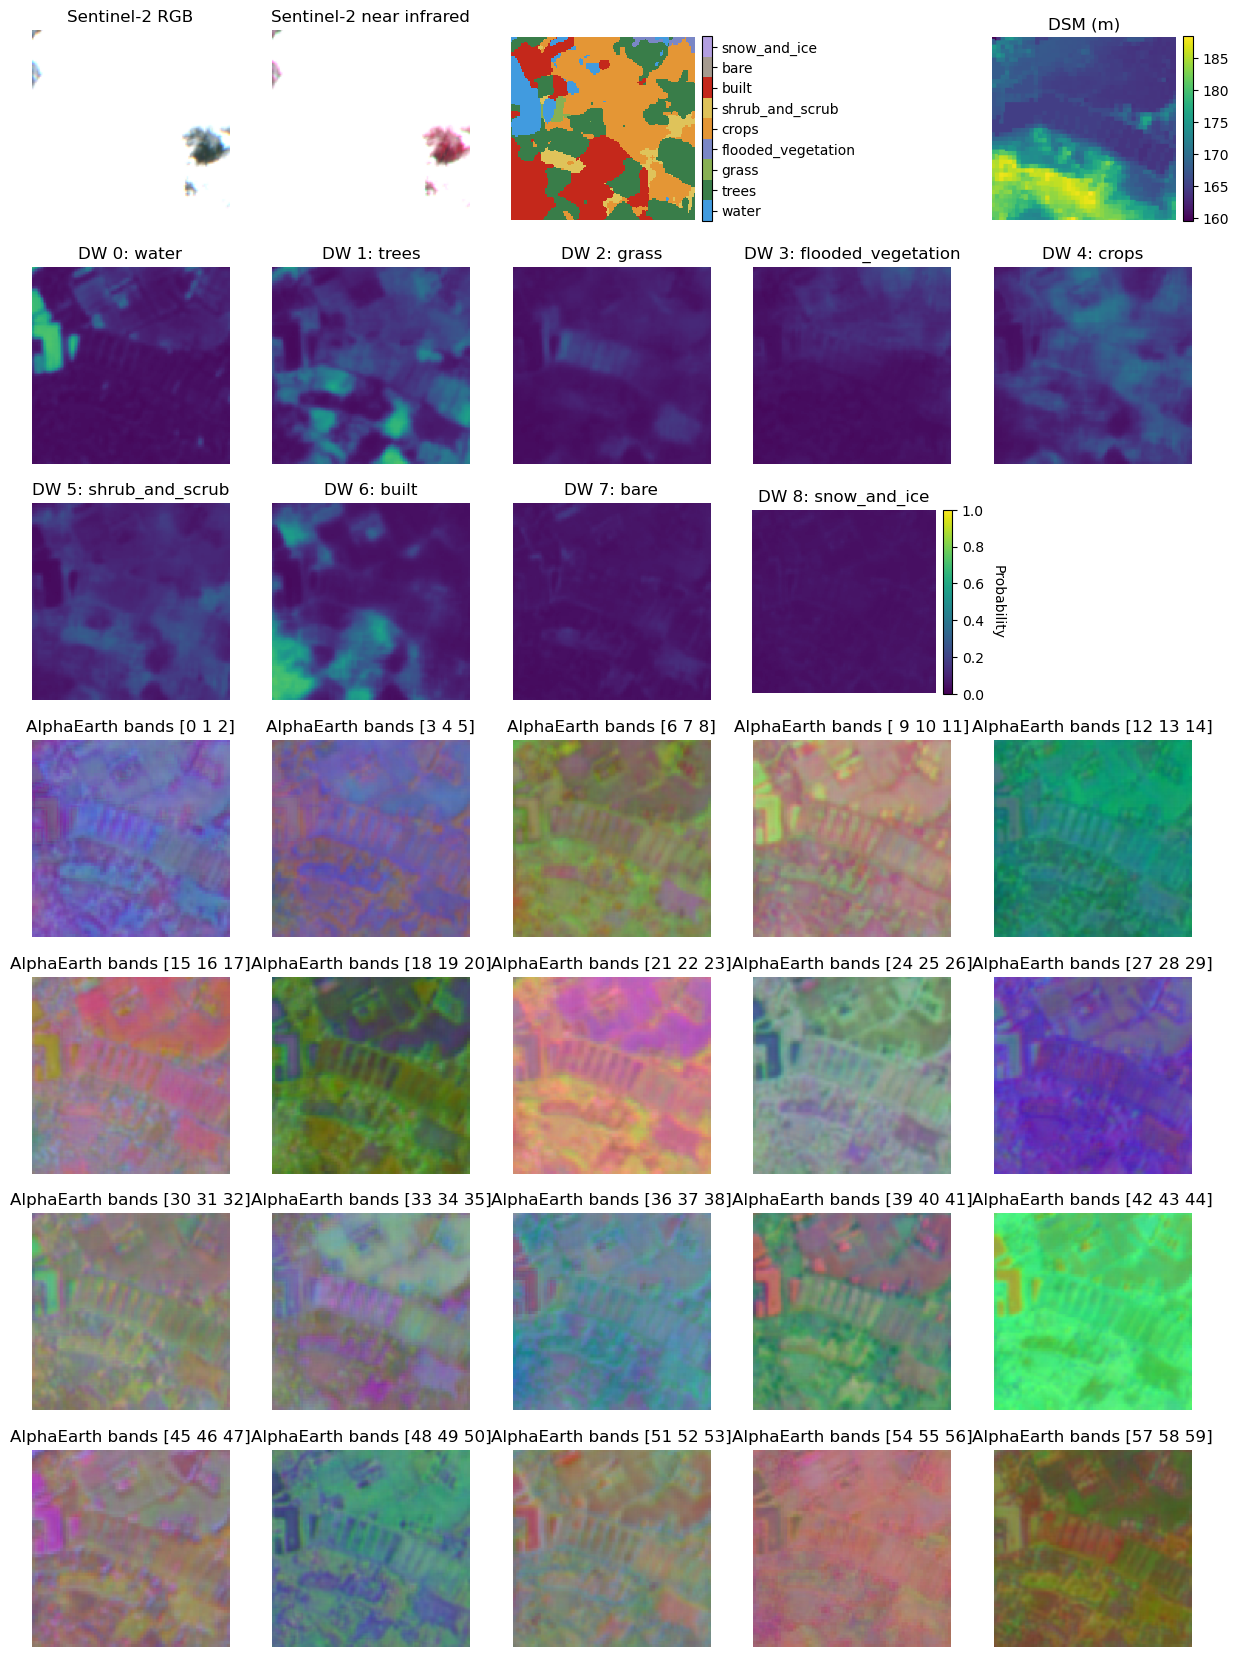

In [273]:
vu.plot_overview_images(
    '/Users/tplas/data/2025-10 neureo/s2100k-300-random-2025-11-15',
    # '/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km_v2', 
                        name='s2100k-300-455', plot_alphaearth=True, plot_dynamicworld_full=True)

# '''
# Notes:
# 5: up-side down?
# '''

# ii += 1

# print(gdf_s2100_sample.iloc[ii])
# print(ii)
# vu.plot_overview_images('/Users/tplas/data/2025-10 neureo/s2100k-100-random-2025-11-15', 
#                         name=f's2100k-100-{ii}', plot_alphaearth=True, plot_dynamicworld_full=True)

In [160]:
coords_keep

lon        lat
0   -1.109573  51.798774
1   -2.399950  53.392663
2   -1.297994  50.864895
3   -0.334642  51.970188
4   -2.155165  52.233593
..        ...        ...
171 -1.961821  55.667004
172 -5.829883  54.248818
173 -2.419119  56.798331
174 -3.221872  56.307879
175 -7.824283  54.259247

[176 rows x 2 columns]

## Other locations  

In [137]:
coords_keep = pd.read_csv('../content/coords_pecl_filtered_30km.csv')
coords_keep.lon.min(), coords_keep.lon.max(), coords_keep.lat.min(), coords_keep.lat.max()

(-7.824283, 1.693422, 49.969258, 58.596981)

<Axes: >

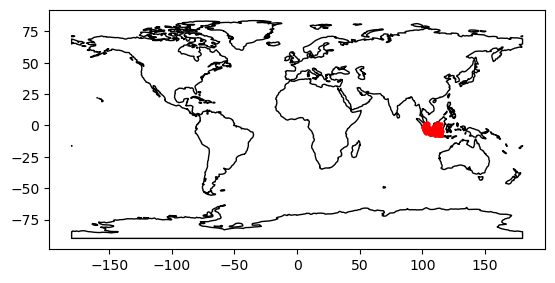

In [146]:
def sample_from_gdf(gdf, lon_min, lon_max, lat_min, lat_max, n_sample):
    gdf_sel = gdf[(gdf.lon >= lon_min) & (gdf.lon <= lon_max) &
                  (gdf.lat >= lat_min) & (gdf.lat <= lat_max)]
    n_gdf_sel = len(gdf_sel)
    if n_gdf_sel < n_sample:
        print(f'Warning: only {n_gdf_sel} points available, less than requested {n_sample}.')
        n_sample = n_gdf_sel
    inds_sample = np.random.choice(n_gdf_sel, size=n_sample, replace=False)
    gdf_sample = gdf_sel.iloc[inds_sample]
    return gdf_sample

gdf_s2100_sample = sample_from_gdf(gdf_s2100k,
                                   lon_min=100, lon_max=115.6,
                                   lat_min=-7.8, lat_max=1.7,
                                   n_sample=150)

world = gpd.read_file(get_path("naturalearth.land"))
ax = world.plot(color="white", edgecolor="black")
gdf_s2100_sample.plot(ax=ax, markersize=5, color='red')

# inds_sample = np.random.choice(n_s2100, size=n_sample, replace=False)
# gdf_s2100_sample = gdf_s2100k.iloc[inds_sample]

In [147]:
coord_list_sample = [(row.lon, row.lat) for idx, row in gdf_s2100_sample.iterrows()]

du.download_list_coord(coord_list=coord_list_sample,
                       name_group='s2100k-100', path_save='/Users/tplas/data/2025-10 neureo/s2100k-113-indonesia-2025-11-14',
                       start_index=0, stop_index=None)

  0%|          | 0/113 [00:00<?, ?it/s]

Created folder /Users/tplas/data/2025-10 neureo/s2100k-113-indonesia-2025-11-14


  1%|          | 1/113 [00:12<23:28, 12.58s/it]

Image s2100k-100-1, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  4%|▎         | 4/113 [00:50<22:39, 12.47s/it]

Image s2100k-100-4, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  4%|▍         | 5/113 [01:09<26:38, 14.80s/it]

Image s2100k-100-5, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  5%|▌         | 6/113 [01:21<24:50, 13.93s/it]

Image s2100k-100-6, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  6%|▌         | 7/113 [01:35<24:43, 13.99s/it]

Image s2100k-100-7, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  7%|▋         | 8/113 [01:46<22:37, 12.93s/it]

Image s2100k-100-8, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  8%|▊         | 9/113 [01:55<20:18, 11.72s/it]

Image s2100k-100-9, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


  9%|▉         | 10/113 [02:04<18:45, 10.92s/it]

 12%|█▏        | 13/113 [02:39<19:48, 11.88s/it]

Image s2100k-100-13, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 13%|█▎        | 15/113 [03:03<19:29, 11.93s/it]

Image s2100k-100-15, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 15%|█▌        | 17/113 [03:24<18:03, 11.28s/it]

Image s2100k-100-17, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 16%|█▌        | 18/113 [03:33<16:42, 10.55s/it]

Image s2100k-100-17, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-18, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 17%|█▋        | 19/113 [03:41<15:16,  9.75s/it]

Image s2100k-100-18, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-19, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 19%|█▊        | 21/113 [04:13<18:59, 12.38s/it]

Image s2100k-100-20, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 19%|█▉        | 22/113 [04:26<18:54, 12.46s/it]

Image s2100k-100-22, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 22%|██▏       | 25/113 [04:55<15:38, 10.66s/it]

Image s2100k-100-25, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 23%|██▎       | 26/113 [05:04<14:41, 10.14s/it]

Image s2100k-100-26, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 25%|██▍       | 28/113 [05:24<14:28, 10.22s/it]

Image s2100k-100-28, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 27%|██▋       | 30/113 [05:46<14:33, 10.52s/it]

Image s2100k-100-30, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 33%|███▎      | 37/113 [07:11<14:50, 11.71s/it]

 35%|███▍      | 39/113 [07:32<13:55, 11.29s/it]

Image s2100k-100-39, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 40%|███▉      | 45/113 [08:35<12:05, 10.67s/it]

Image s2100k-100-45, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 41%|████      | 46/113 [08:45<11:47, 10.56s/it]

Image s2100k-100-46, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 42%|████▏     | 47/113 [08:55<11:34, 10.52s/it]

Image s2100k-100-47, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 42%|████▏     | 48/113 [09:04<10:48,  9.97s/it]

 43%|████▎     | 49/113 [09:15<10:56, 10.26s/it]

Image s2100k-100-49, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 44%|████▍     | 50/113 [09:25<10:35, 10.09s/it]

Image s2100k-100-49, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-50, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 45%|████▌     | 51/113 [09:34<10:20, 10.00s/it]

Image s2100k-100-51, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 46%|████▌     | 52/113 [09:46<10:32, 10.38s/it]

Image s2100k-100-52, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 47%|████▋     | 53/113 [09:53<09:22,  9.37s/it]

Image s2100k-100-53, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 48%|████▊     | 54/113 [10:00<08:30,  8.66s/it]

Image s2100k-100-53, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.
Image s2100k-100-53, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-54, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 49%|████▊     | 55/113 [10:08<08:09,  8.43s/it]

Image s2100k-100-55, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 50%|████▉     | 56/113 [10:19<08:59,  9.46s/it]

Image s2100k-100-56, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 52%|█████▏    | 59/113 [10:49<08:56,  9.93s/it]

Image s2100k-100-59, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 53%|█████▎    | 60/113 [10:56<08:07,  9.21s/it]

Image s2100k-100-60, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 55%|█████▍    | 62/113 [11:17<08:27,  9.94s/it]

Image s2100k-100-62, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 56%|█████▌    | 63/113 [11:27<08:21, 10.03s/it]

Image s2100k-100-63, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 57%|█████▋    | 64/113 [11:37<08:09,  9.99s/it]

Image s2100k-100-64, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-64, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 58%|█████▊    | 65/113 [11:43<07:05,  8.87s/it]

Image s2100k-100-64, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 59%|█████▉    | 67/113 [12:04<07:27,  9.73s/it]

Image s2100k-100-67, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 61%|██████    | 69/113 [12:24<07:16,  9.91s/it]

Image s2100k-100-69, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 62%|██████▏   | 70/113 [12:32<06:40,  9.31s/it]

Image s2100k-100-70, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 63%|██████▎   | 71/113 [12:39<06:07,  8.75s/it]

Image s2100k-100-70, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.
Image s2100k-100-70, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 65%|██████▍   | 73/113 [13:03<06:48, 10.22s/it]

Image s2100k-100-73, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 65%|██████▌   | 74/113 [13:12<06:26,  9.92s/it]

Image s2100k-100-74, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 66%|██████▋   | 75/113 [13:21<06:13,  9.83s/it]

Image s2100k-100-75, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 67%|██████▋   | 76/113 [13:31<05:58,  9.69s/it]

Image s2100k-100-76, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 68%|██████▊   | 77/113 [13:40<05:47,  9.65s/it]

Image s2100k-100-77, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 71%|███████   | 80/113 [14:10<05:29,  9.98s/it]

Image s2100k-100-80, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 72%|███████▏  | 81/113 [14:17<04:46,  8.94s/it]

Image s2100k-100-81, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 73%|███████▎  | 82/113 [14:26<04:42,  9.10s/it]

Image s2100k-100-82, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-82, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 73%|███████▎  | 83/113 [14:35<04:25,  8.84s/it]

Image s2100k-100-83, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 74%|███████▍  | 84/113 [14:42<04:03,  8.40s/it]

Image s2100k-100-84, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 75%|███████▌  | 85/113 [14:53<04:14,  9.08s/it]

Image s2100k-100-85, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 76%|███████▌  | 86/113 [14:59<03:43,  8.26s/it]

Image s2100k-100-86, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 78%|███████▊  | 88/113 [15:18<03:49,  9.20s/it]

Image s2100k-100-88, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 80%|███████▉  | 90/113 [15:41<03:54, 10.19s/it]

Image s2100k-100-90, alphaearth could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.
Image s2100k-100-90, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 81%|████████  | 91/113 [15:47<03:19,  9.07s/it]

Image s2100k-100-90, dsm could not be downloaded, error: Image.clip: Parameter 'input' is required and may not be null.


 81%|████████▏ | 92/113 [15:58<03:21,  9.58s/it]

Image s2100k-100-92, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 84%|████████▍ | 95/113 [16:33<03:21, 11.21s/it]

Image s2100k-100-95, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 85%|████████▍ | 96/113 [20:49<23:57, 84.55s/it]

Image s2100k-100-96, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 87%|████████▋ | 98/113 [21:11<11:47, 47.18s/it]

Image s2100k-100-98, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 88%|████████▊ | 99/113 [21:22<08:27, 36.24s/it]

Image s2100k-100-99, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 88%|████████▊ | 100/113 [21:32<06:10, 28.48s/it]

Image s2100k-100-100, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 89%|████████▉ | 101/113 [21:40<04:27, 22.32s/it]

Image s2100k-100-101, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 90%|█████████ | 102/113 [21:50<03:24, 18.55s/it]

Image s2100k-100-102, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 91%|█████████ | 103/113 [21:59<02:35, 15.56s/it]

Image s2100k-100-103, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 92%|█████████▏| 104/113 [22:06<01:57, 13.08s/it]

Image s2100k-100-104, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 93%|█████████▎| 105/113 [22:17<01:39, 12.38s/it]

 94%|█████████▍| 106/113 [22:28<01:24, 12.11s/it]

Image s2100k-100-106, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 95%|█████████▍| 107/113 [22:36<01:05, 10.95s/it]

Image s2100k-100-107, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 96%|█████████▌| 108/113 [23:59<02:42, 32.57s/it]

 96%|█████████▋| 109/113 [24:10<01:44, 26.15s/it]

Image s2100k-100-109, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 97%|█████████▋| 110/113 [24:21<01:04, 21.41s/it]

Image s2100k-100-110, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


 98%|█████████▊| 111/113 [24:29<00:34, 17.38s/it]

 99%|█████████▉| 112/113 [24:41<00:15, 15.93s/it]

Image s2100k-100-112, worldclimbio could not be downloaded, error: Element.toDictionary: Parameter 'element' is required and may not be null.


100%|██████████| 113/113 [24:51<00:00, 13.20s/it]

Images that could not be downloaded: ['1_worldclimbio', '4_worldclimbio', '5_worldclimbio', '6_worldclimbio', '7_worldclimbio', '8_worldclimbio', '9_worldclimbio', '10_alphaearth', '13_worldclimbio', '15_worldclimbio', '17_worldclimbio', '17_dsm', '18_worldclimbio', '18_dsm', '19_alphaearth', '19_worldclimbio', '20_worldclimbio', '20_dsm', '22_worldclimbio', '25_worldclimbio', '26_worldclimbio', '28_worldclimbio', '30_worldclimbio', '36_dsm', '39_alphaearth', '39_worldclimbio', '45_worldclimbio', '46_worldclimbio', '47_worldclimbio', '47_dsm', '49_worldclimbio', '49_dsm', '50_worldclimbio', '51_worldclimbio', '51_dsm', '52_worldclimbio', '53_alphaearth', '53_worldclimbio', '53_dsm', '54_sentinel2', '54_worldclimbio', '55_worldclimbio', '56_worldclimbio', '59_worldclimbio', '60_worldclimbio', '62_worldclimbio', '63_worldclimbio', '64_alphaearth', '64_worldclimbio', '64_dsm', '67_worldclimbio', '69_worldclimbio', '70_alphaearth', '70_worldclimbio', '70_dsm', '73_worldclimbio', '74_worldc

['1_worldclimbio',
 '4_worldclimbio',
 '5_worldclimbio',
 '6_worldclimbio',
 '7_worldclimbio',
 '8_worldclimbio',
 '9_worldclimbio',
 '10_alphaearth',
 '13_worldclimbio',
 '15_worldclimbio',
 '17_worldclimbio',
 '17_dsm',
 '18_worldclimbio',
 '18_dsm',
 '19_alphaearth',
 '19_worldclimbio',
 '20_worldclimbio',
 '20_dsm',
 '22_worldclimbio',
 '25_worldclimbio',
 '26_worldclimbio',
 '28_worldclimbio',
 '30_worldclimbio',
 '36_dsm',
 '39_alphaearth',
 '39_worldclimbio',
 '45_worldclimbio',
 '46_worldclimbio',
 '47_worldclimbio',
 '47_dsm',
 '49_worldclimbio',
 '49_dsm',
 '50_worldclimbio',
 '51_worldclimbio',
 '51_dsm',
 '52_worldclimbio',
 '53_alphaearth',
 '53_worldclimbio',
 '53_dsm',
 '54_sentinel2',
 '54_worldclimbio',
 '55_worldclimbio',
 '56_worldclimbio',
 '59_worldclimbio',
 '60_worldclimbio',
 '62_worldclimbio',
 '63_worldclimbio',
 '64_alphaearth',
 '64_worldclimbio',
 '64_dsm',
 '67_worldclimbio',
 '69_worldclimbio',
 '70_alphaearth',
 '70_worldclimbio',
 '70_dsm',
 '73_worldcl

# Replice pecl 100

In [283]:
dir_pecl100 = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km'
dir_pecl100_v2 = '/Users/tplas/data/2025-10 neureo/pecl-100-subsample-30km_v2'
dir_pecl176 = '/Users/tplas/data/2025-10 neureo/pecl-176-subsample-30km_v2'

assert os.path.exists(dir_pecl100)
assert os.path.exists(dir_pecl176)

print(len(os.listdir(dir_pecl100)), len(os.listdir(dir_pecl176)))

if not os.path.exists(dir_pecl100_v2):
    os.makedirs(dir_pecl100_v2)

names_files = np.unique([f.split('_')[0] for f in os.listdir(dir_pecl100)])

import shutil
for f in os.listdir(dir_pecl176):
    if f.split('_')[0] in names_files:
        shutil.copy(os.path.join(dir_pecl176, f), os.path.join(dir_pecl100_v2, f))

500 869
